# Лабораторная работа 1

Скиданова Анна, 6231

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import seaborn as sns
from scripts.classifiers.softmax import softmax_loss_naive
import time
from scripts.classifiers import Softmax
from scripts.classifiers.softmax import softmax_loss_naive
import time



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digits.keys()
mnist_images=digits['images']
mnist_data=digits['data']
mnist_target=digits.target

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



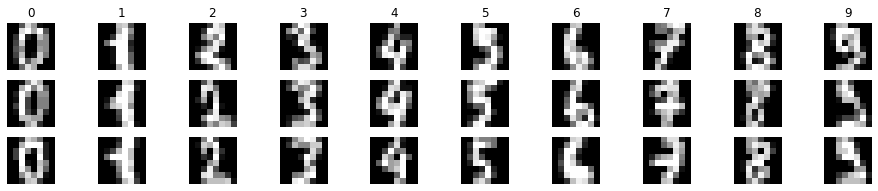

In [4]:
pic_box = plt.figure(figsize=(16,4)) 

for i in range(0,30):
    if(i<10):
        pic_box.add_subplot(4,10,i+1).set_title(i)
    else:
        pic_box.add_subplot(4,10,i+1)
    plt.imshow(mnist_images[i])
    plt.axis('off')
plt.show()    

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(mnist_data,mnist_target, test_size=0.2, random_state=0)

In [6]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (1437, 64)
Training labels shape:  (1437,)
Test data shape:  (360, 64)
Test labels shape:  (360,)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [7]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [8]:
y=classifier.predict(X_test,2,0)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


<AxesSubplot:>

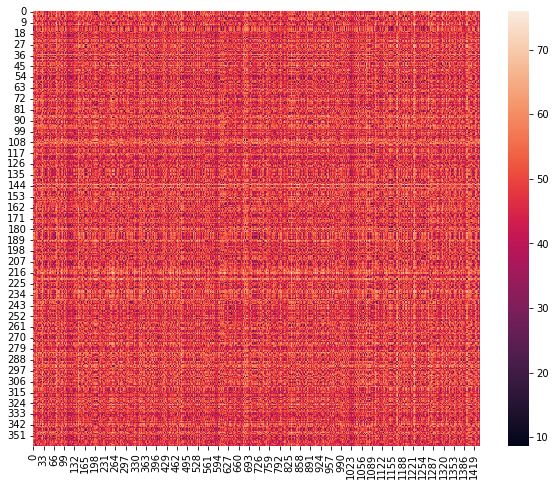

In [9]:
M=classifier.compute_distances_no_loops(X_test)
sns.heatmap(M)


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [13]:
def acc(y,y_t):
    return np.mean(y==y_t)

print("Доля правильно классифицированных изображений:")
acc(y,y_test)

Доля правильно классифицированных изображений:


0.9888888888888889

1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [14]:
y=classifier.predict(X_test,3,0)

In [15]:
t=[]
for k in range(2,12):
    y=classifier.predict(X_test,k,0)
    t.append(acc(y,y_test))

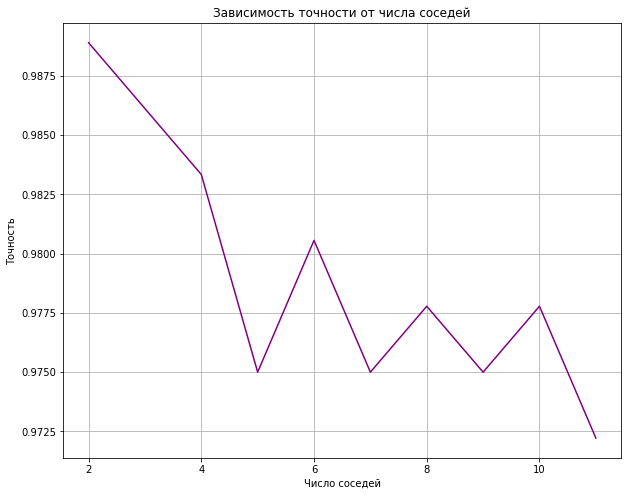

In [16]:
plt.plot( range(2,12), t,color='purple')
plt.xlabel("Число соседей")
plt.ylabel("Точность")
plt.title("Зависимость точности от числа соседей")
plt.grid()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [17]:
num_exp = 5
neighbors = [1,2, 3, 5, 7, 9, 11, 13, 15, 20]

X_train_exp = []
y_train_exp = []

X_train_exp = np.array_split(X_train, num_exp)
y_train_exp = np.array_split(y_train, num_exp)

In [18]:
k_acc={}

for k in neighbors:
    k_acc[k]=list()
    
for k in neighbors:
    for j in range(num_exp):
        
        X_train_p = np.vstack(X_train_exp[0:j] + X_train_exp[j+1:])
        X_test_p = X_train_exp[j]

        y_train_p = np.hstack(y_train_exp[0:j]+y_train_exp[j+1:])
        y_test_p = y_train_exp[j]

        knn = KNearestNeighbor()
        knn.train(X_train_p, y_train_p)
        pred=knn.predict(X_test_p,k,0)

        k_acc[k].append(acc(pred,y_test_p))

In [19]:
best_k=0
best_acc=0
for i in neighbors:
    acc_m=np.mean(k_acc[i])
    if(acc_m>best_acc):
        best_acc=acc_m
        best_k=i     
print("The best k", best_k, ",the best accuracy", best_acc)

The best k 3 ,the best accuracy 0.9860796554394116



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [20]:
knn = KNearestNeighbor()
knn.train(X_train, y_train)
pred=knn.predict(X_test,best_k,0)
acc(pred,y_test)

0.9861111111111112

1.11 Сделайте выводы по результатам 1 части задания.

Метод kNN позволяет получить довольно хорошие результаты классификации. Кросс-валидация и график указали на одинаковый набор параметров, позволяющий получить наилучший результат.

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(mnist_data,mnist_target, test_size=0.2, random_state=0)

num_training=1237
num_dev=200
mask = range(num_training,num_training+200)
X_val = X_train[mask]
y_val = y_train[mask]
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

  
  # Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

In [22]:
print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('dev data shape: ', X_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Train data shape:  (1237, 64)
Train labels shape:  (1237,)
Validation data shape:  (200, 64)
Validation labels shape:  (200,)
Test data shape:  (360, 64)
Test labels shape:  (360,)
dev data shape:  (200, 64)
dev labels shape:  (200,)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[0.00000000e+00 3.18512530e-01 5.25060631e+00 1.17679871e+01
 1.18860146e+01 5.81972514e+00 1.35974131e+00 1.37429264e-01
 5.65885206e-03 2.01374293e+00]


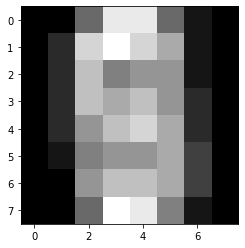

(1237, 65) (200, 65) (360, 65)


In [23]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((8,8)).astype('uint8')) 
plt.show()

X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
  
print(X_train.shape, X_val.shape, X_test.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [25]:
W = np.random.randn(65, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.302904
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [27]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -0.108637 analytic: -0.108637, relative error: 1.341275e-10
numerical: -0.249483 analytic: -0.249483, relative error: 2.586925e-10
numerical: 0.389380 analytic: 0.389380, relative error: 2.053377e-11
numerical: 0.176475 analytic: 0.176475, relative error: 1.864138e-10
numerical: -0.180357 analytic: -0.180357, relative error: 2.188106e-10
numerical: -0.575562 analytic: -0.575562, relative error: 1.631194e-10
numerical: 0.027406 analytic: 0.027406, relative error: 3.770943e-10
numerical: -0.178104 analytic: -0.178104, relative error: 6.776453e-11
numerical: 0.000008 analytic: 0.000008, relative error: 2.907367e-06
numerical: -0.701131 analytic: -0.701131, relative error: 6.487277e-11
numerical: 0.009060 analytic: 0.009060, relative error: 2.650592e-09
numerical: -0.261564 analytic: -0.261564, relative error: 2.020259e-11
numerical: -0.002073 analytic: -0.002073, relative error: 1.169366e-08
numerical: 0.830220 analytic: 0.830220, relative error: 6.251595e-11
numerical: -0.0012

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [28]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.302904e+00 computed in 0.026636s
vectorized loss: 2.302904e+00 computed in 0.000000s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [29]:
softmax = Softmax()
tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 18.316229
iteration 100 / 1500: loss 12.011413
iteration 200 / 1500: loss 8.187814
iteration 300 / 1500: loss 5.869105
iteration 400 / 1500: loss 4.464239
iteration 500 / 1500: loss 3.613737
iteration 600 / 1500: loss 3.098179
iteration 700 / 1500: loss 2.783775
iteration 800 / 1500: loss 2.595024
iteration 900 / 1500: loss 2.479900
iteration 1000 / 1500: loss 2.409958
iteration 1100 / 1500: loss 2.367795
iteration 1200 / 1500: loss 2.342118
iteration 1300 / 1500: loss 2.326689
iteration 1400 / 1500: loss 2.317130
That took 0.895648s


In [30]:
y_train_pred = softmax.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.660469
validation accuracy: 0.655000


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [31]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

In [34]:
res = {}
best_val = -1
best_lr=0
best_rs=0
softmax = Softmax()
iters = 500
for lr in learning_rates:
    for rs in regularization_strengths:
        softmax.train(X_train, y_train, learning_rate=lr, reg=rs,
                      num_iters=iters)
        y_train_pred = softmax.predict(X_train)
        accu_train = np.mean(y_train==y_train_pred)
        y_val_pred = softmax.predict(X_val)
        accu_val = np.mean(y_val==y_val_pred)
        res[(lr,rs)] = (accu_train, accu_val)
        if best_val < accu_val:
            best_softmax = Softmax
            best_val = accu_val
            best_lr=lr
            best_rs=rs


In [35]:
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = res[(lr, reg)]
    print('lr',lr, 'reg',reg, 'train accuracy:',train_accuracy,'val accuracy:', val_accuracy)
    
print('best accuracy:', best_val)

lr 1e-07 reg 25000.0 train accuracy: 0.185125303152789 val accuracy: 0.18
lr 1e-07 reg 50000.0 train accuracy: 0.5521422797089733 val accuracy: 0.48
lr 5e-05 reg 25000.0 train accuracy: 0.7865804365400162 val accuracy: 0.805
lr 5e-05 reg 50000.0 train accuracy: 0.6054971705739692 val accuracy: 0.585
best accuracy: 0.805


In [56]:
softmax.train(X_train, y_train, learning_rate=best_lr, reg=best_rs,
                      num_iters=iters)
y_train_pred = softmax.predict(X_test)
accu_train = np.mean(y_test==y_train_pred)
accu_train

0.8083333333333333

3.10 Сделайте выводы по третьей части задания

Использование softmax классификатора дало удовлетварительные результаты, которые, однако, оказались гораздо хуже чем результаты полученные с помощью классификатора kNN